In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
data=pd.read_csv('scaled_dataset.csv')

In [7]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.2,-0.257516,-0.267660,0.0,0.652174,0.243243,1.193303,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.6,0.464671,0.029682,3.0,0.065217,-0.486486,0.000000,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,-0.100761,0.399288,0.0,0.608696,0.216216,0.986301,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,-0.535329,0.017513,0.0,-1.260870,-0.648649,0.000000,0.0,-1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
4,0.2,0.634651,0.951802,0.0,0.586957,0.162162,2.130898,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


MODELS WITHOUT FEATURE SELECTION (RIDGE 91%)


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
dataset_path = 'scaled_dataset.csv'
df = pd.read_csv(dataset_path)

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (Degree=4)": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = (mae, mse, rmse, r2)

# Display results
print("\nModel Performance Before Tuning:")
for name, (mae, mse, rmse, r2) in results.items():
    print(f"{name}:\n  MAE: {mae:.4f}\n  MSE: {mse:.4f}\n  RMSE: {rmse:.4f}\n  R2 Score: {r2:.4f}\n")

# Select best model (highest R2 score)
best_model_name = max(results, key=lambda x: results[x][3])
best_model = models[best_model_name]
print(f"Best Model Before Tuning: {best_model_name}\n")

# Hyperparameter tuning for the best model
if isinstance(best_model, Ridge) or isinstance(best_model, Lasso):
    param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}
elif "Polynomial" in best_model_name:
    param_grid = {"polynomialfeatures__degree": [2, 3, 4]}
else:
    param_grid = {}

if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    tuned_model = grid_search.best_estimator_
    y_pred_tuned = tuned_model.predict(X_test)

    tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
    tuned_mse = mean_squared_error(y_test, y_pred_tuned)
    tuned_rmse = np.sqrt(tuned_mse)
    tuned_r2 = r2_score(y_test, y_pred_tuned)

    print("\nModel Performance After Tuning:")
    print(f"{best_model_name}:\n  MAE: {tuned_mae:.4f}\n  MSE: {tuned_mse:.4f}\n  RMSE: {tuned_rmse:.4f}\n  R2 Score: {tuned_r2:.4f}\n")
    print(f"Best Parameters: {grid_search.best_params_}")



Model Performance Before Tuning:
Linear Regression:
  MAE: 0.0148
  MSE: 0.0069
  RMSE: 0.0834
  R2 Score: 0.9172

Polynomial Regression (Degree=4):
  MAE: 0.0400
  MSE: 0.0113
  RMSE: 0.1063
  R2 Score: 0.8654

Ridge Regression:
  MAE: 0.0160
  MSE: 0.0068
  RMSE: 0.0827
  R2 Score: 0.9184

Lasso Regression:
  MAE: 0.1609
  MSE: 0.0840
  RMSE: 0.2898
  R2 Score: -0.0009

Best Model Before Tuning: Ridge Regression


Model Performance After Tuning:
Ridge Regression:
  MAE: 0.0160
  MSE: 0.0068
  RMSE: 0.0827
  R2 Score: 0.9184

Best Parameters: {'alpha': 1}


MODELS WITH FEATURE SELECTION (RIDGE 92%)


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

# Load dataset
dataset_path = 'scaled_dataset.csv'
df = pd.read_csv(dataset_path)

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Feature Selection using Lasso
lasso = Lasso(alpha=0.01)  # Small alpha to allow feature selection
lasso.fit(X, y)
selector = SelectFromModel(lasso, prefit=True)
X_selected = selector.transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (Degree=4)": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = (mae, mse, rmse, r2)

# Display results
print("\nModel Performance After Feature Selection:")
for name, (mae, mse, rmse, r2) in results.items():
    print(f"{name}:\n  MAE: {mae:.4f}\n  MSE: {mse:.4f}\n  RMSE: {rmse:.4f}\n  R2 Score: {r2:.4f}\n")

# Select best model (highest R2 score)
best_model_name = max(results, key=lambda x: results[x][3])
best_model = models[best_model_name]
print(f"Best Model After Feature Selection: {best_model_name}\n")



Model Performance After Feature Selection:
Linear Regression:
  MAE: 0.0080
  MSE: 0.0067
  RMSE: 0.0820
  R2 Score: 0.9198

Polynomial Regression (Degree=4):
  MAE: 0.0089
  MSE: 0.0067
  RMSE: 0.0820
  R2 Score: 0.9199

Ridge Regression:
  MAE: 0.0099
  MSE: 0.0066
  RMSE: 0.0815
  R2 Score: 0.9209

Lasso Regression:
  MAE: 0.1609
  MSE: 0.0840
  RMSE: 0.2898
  R2 Score: -0.0009

Best Model After Feature Selection: Ridge Regression



/Users/mohammedwalidadawy/miniconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


SHAKLO OVERFITTING HAMAWET NAFSIII


Train R² Score: 0.9868
Test R² Score: 0.9171
Final Stacking Model R² Score: 0.9723


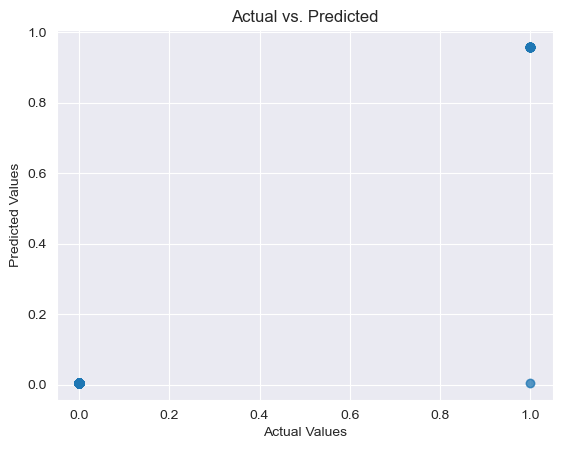

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
dataset_path = 'scaled_dataset.csv'
df = pd.read_csv(dataset_path)

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hyperparameter tuning for Ridge (Adjust Regularization)
alpha_values = {'alpha': np.logspace(-3, 3, 50)}
ridge_cv = GridSearchCV(Ridge(), alpha_values, cv=5, scoring='r2')
ridge_cv.fit(X_scaled, y)
best_alpha = ridge_cv.best_params_['alpha'] * 3  # Moderate increase in alpha

# Feature Selection using Lasso (Keep More Features)
lasso = Lasso(alpha=0.03)  # Lower alpha to keep more features
lasso.fit(X_scaled, y)
selected_features = np.abs(lasso.coef_) > 5e-3  # Less strict threshold
X_selected = X_scaled[:, selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define Stacking Model with Adjusted Complexity
stacking_model = StackingRegressor(
    estimators=[
        ('ridge', Ridge(alpha=best_alpha)),
        ('lasso', Lasso(alpha=0.02)),
        ('rf', RandomForestRegressor(n_estimators=150, max_depth=15, random_state=42))  # More trees, deeper
    ],
    final_estimator=Ridge(alpha=best_alpha / 2)  # Reduce final Ridge alpha
)

# Train the Stacking Model
stacking_model.fit(X_train, y_train)

# Evaluate on Train & Test Data
train_score = stacking_model.score(X_train, y_train)
test_score = stacking_model.score(X_test, y_test)

print(f"Train R² Score: {train_score:.4f}")
print(f"Test R² Score: {test_score:.4f}")

# Evaluate Stacking Model using 5-Fold Cross-Validation
stacking_score = np.mean(cross_val_score(stacking_model, X_selected, y, cv=5, scoring='r2'))
print(f"Final Stacking Model R² Score: {stacking_score:.4f}")

# Residual Analysis
y_pred = stacking_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()
